# I] Import and options


In [1]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [3]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [23]:
%%time
data = "ecar_exp1_df_", "ecar_exp2_df_", "ecar_exp3_df_"

ecar_baf_exps = []
for file in data:
    path = output_file_directory + "ATG7/Seahorse_results/seahorse_ECAR/"+file+"baf.csv"
    df = pandas.read_csv(path, sep = ",")
    
    df = df.assign(EVnorm= df['Empty Vector +dox']/ df['Empty Vector +dox'],
                   ATG7_1norm= df['ATG7(1)']/ df['Empty Vector +dox'],
                   ATG7_2norm= df['ATG7(2)']/ df['Empty Vector +dox'])
    df = df[['EVnorm','ATG7_1norm','ATG7_2norm']]
    df = df.rename(columns = {'EVnorm' : 'MEF-/-','ATG7_1norm' : 'ATG7(1)','ATG7_2norm' : 'ATG7(2)'})
    ecar_baf_exps.append(df)

BAF_exp = pandas.concat([ecar_baf_exps[0], ecar_baf_exps[1], ecar_baf_exps[2]], axis=0)
BAF_exp

Wall time: 18.9 ms


,MEF-/-,ATG7(1),ATG7(2)
0,1.0,1.189939,0.711381
1,1.0,1.237981,0.698163
2,1.0,1.309724,0.703404
0,1.0,0.997847,0.576276
1,1.0,1.055864,0.597071
2,1.0,1.054395,0.592903
0,1.0,0.933618,0.651319
1,1.0,0.941970,0.684557
2,1.0,0.900535,0.674361


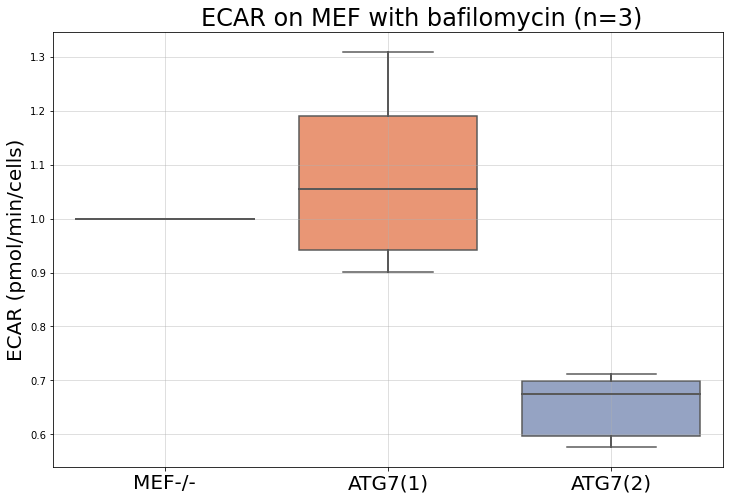

In [24]:
seaborn.boxplot(palette = 'Set2', data = BAF_exp, 
                medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('ECAR (pmol/min/cells)')
plt.xlabel('')
plt.title('ECAR on MEF with bafilomycin (n=3)', x=.55)
plt.grid(alpha = 0.5)

# save
path = 'ATG7/Seahorse_results/seahorse_ECAR/'
plt.savefig(output_file_directory+path+'graph_all_ecar_bafilomycin.svg')
